In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

In [22]:
voice_data = pd.read_csv('data/voice_gender.csv')
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [23]:
voice_data.isnull().sum().sum()

0

In [24]:
voice_data['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

In [39]:
X = voice_data.drop('label', axis=1)
y = voice_data['label'].apply(lambda val: 1 if val == 'male' else 0)

In [50]:
y.value_counts()

1    1584
0    1584
Name: label, dtype: int64

In [51]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


[Text(0.5, 0.75, 'meanfun <= 0.142\nentropy = 1.0\nsamples = 2534\nvalue = [1267, 1267]'),
 Text(0.25, 0.25, 'entropy = 0.313\nsamples = 1296\nvalue = [73, 1223]'),
 Text(0.75, 0.25, 'entropy = 0.221\nsamples = 1238\nvalue = [1194, 44]')]

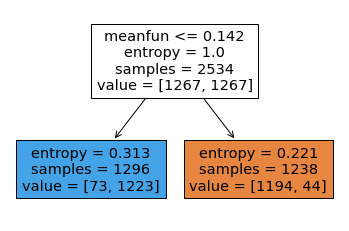

In [55]:
model = tree.DecisionTreeClassifier(max_depth=1, criterion='entropy')
model.fit(X_train, y_train)

tree.plot_tree(
    model,
    feature_names=X.columns,
    filled=True,
    impurity=True
    
)

In [60]:
y_test_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_test_pred))

0.9558359621451105


[Text(0.5, 0.8333333333333334, 'meanfun <= 0.142\nentropy = 1.0\nsamples = 2534\nvalue = [1267, 1267]'),
 Text(0.25, 0.5, 'IQR <= 0.074\nentropy = 0.313\nsamples = 1296\nvalue = [73, 1223]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.972\nsamples = 82\nvalue = [49, 33]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.14\nsamples = 1214\nvalue = [24, 1190]'),
 Text(0.75, 0.5, 'Q25 <= 0.157\nentropy = 0.221\nsamples = 1238\nvalue = [1194, 44]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.575\nsamples = 293\nvalue = [253, 40]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.039\nsamples = 945\nvalue = [941, 4]')]

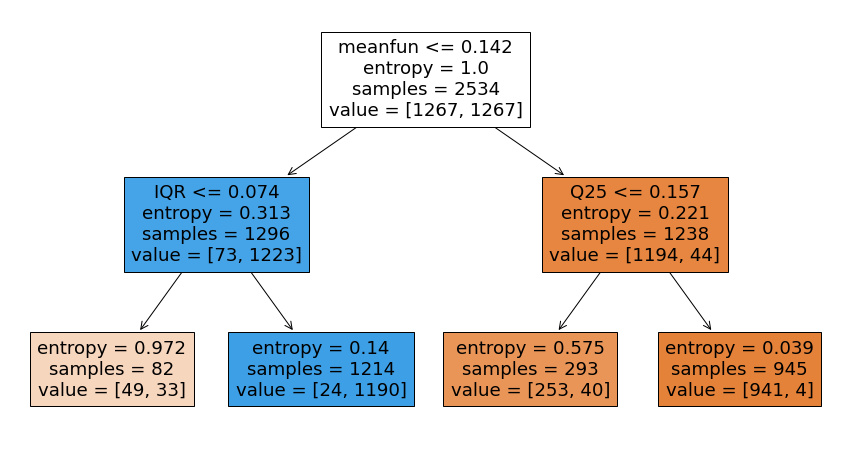

In [62]:
model = tree.DecisionTreeClassifier(max_depth=2, criterion='entropy')
model.fit(X_train, y_train)

plt.figure(figsize=(15, 8))
tree.plot_tree(
    model,
    feature_names=X.columns,
    filled=True,
    impurity=True
)

In [63]:
y_test_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_test_pred))

0.9621451104100947


In [65]:
model = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [67]:
print(model.get_depth())
print(model.get_n_leaves())
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

12
54
1.0
0.973186119873817


In [72]:
param_grid = {
    'criterion': ['gini', 'entropy'], #критерий информативности
    'max_depth': [4, 5, 6, 7, 8, 9, 10], #максимальная глубина дерева
    'min_samples_split': [3, 4, 5, 10] #минимальное количество объектов, необходимое для сплита
}
model = tree.DecisionTreeClassifier(random_state=0)
cv = model_selection.StratifiedKFold(n_splits=5)
grid = model_selection.GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy'
)
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [3, 4, 5, 10]},
             scoring='accuracy')

In [73]:
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 3}


In [74]:
model = tree.DecisionTreeClassifier(**grid.best_params_, random_state=0)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.9956590370955012
0.9700315457413249


In [99]:
model.feature_names_in_.shape

(20,)

In [114]:
feature = model.feature_importances_.reshape((1,20))

In [111]:
imp = pd.DataFrame(data=feature, columns=X.columns)
imp


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.002571,0.00412,0.003247,0.001432,0.003614,0.05681,0.004196,0.006544,0.000919,0.018004,0.006047,0.005985,0.861347,0.014153,0.0,0.0012,0.001534,0.0,0.006888,0.001388


<AxesSubplot:>

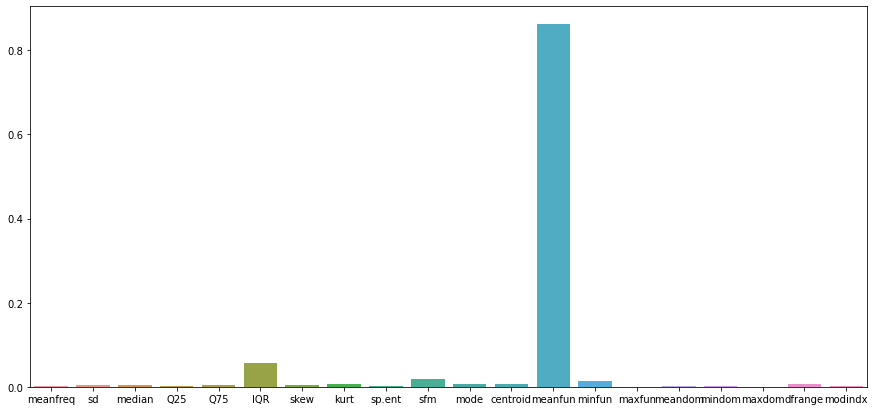

In [112]:
plt.figure(figsize=(15, 7))
sns.barplot(data=imp)